# Sequential update of worksheet files
This worksheet exports other worksheets to .sage files in order to save time when executing every particular worksheet.
It can also be used to consecutively run other worksheets, by exporting them to .sage files and then loading them into the current worksheet, which executes all the code in each worksheet.

In [1]:
import json   # for reading notebook metadata
def fun_export_ipynb(worksheet, folder):
    '''
    Exports worksheet.ipynb to a .py or .sage depending on kernel.
    Example:
    fun_export_ipynb('Worksheet_setup', 'temp/')
    Need to import json before using this function. Unless option output=True is given,
    each line of text has a semicolon added in the .py file, preventing any output.
    '''
    str1 = 'jupyter nbconvert  --to=python \'' + worksheet+'.ipynb\''
    print str1
    print 'Exporting specified worksheet to .py file...'
    
    try:
        retcode = os.system(str1)
        if retcode < 0:
            print >>sys.stderr, "nbconvert was terminated by signal", -retcode
        else:
            print >>sys.stderr, "nbconvert returned", retcode
    except OSError as e:
        print >>sys.stderr, "Execution failed:", e
        print >>sys.stderr, "Trying ipython nbconvert instead..."
        str1 = 'ipython nbconvert  --to script \'' + worksheet+'.ipynb\''    # for new version of python
        try:      
            retcode = os.system(str1)
            if retcode < 0:
                print >>sys.stderr, "nbconvert was terminated by signal", -retcode
            else:
                print >>sys.stderr, "nbconvert returned", retcode
        except OSError as e:
            print >>sys.stderr, "Execution failed:", e              

    str1 = worksheet + '.py'
    
    print 'Checking if specified ipynb file was run with sage kernel...'
    with open(worksheet+'.ipynb') as data_file:    
        data = json.load(data_file)
    
    if data['metadata']['kernelspec']['name'][0:4] == 'sage':
        print 'Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)'
        str2 = folder + worksheet + '.sage'
        os.rename(str1, str2)

In [2]:
fun_export_ipynb('Worksheet_setup', 'temp/')

jupyter nbconvert  --to=python 'Worksheet_setup.ipynb'
Exporting specified worksheet to .py file...
Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)


nbconvert returned 0


In [4]:
load('temp/Worksheet_setup.sage')

/home/sschyman/Programs/sage-upgrade/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


In [10]:
def fun_export_load_ipynb(list_wsnames, folder):
    '''
    Exports worksheet 'name' to .sage file and then imports it 
    into current worksheet, executing all code and displaying its output.
    '''
    for name in list_wsnames:
        fun_export_ipynb(name, folder)
        print 'created file ' + folder + name
        load(folder + name + '.sage')
        print 'imported file ' + folder + name

jupyter nbconvert  --to=python 'leaf_enbalance_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file data/leaf_enbalance_eqs


R_s == E_l + H_l + R_ll

R_ll == (T_l^4 - T_w^4)*a_sh*epsilon_l*sigm

H_l == -(T_a - T_l)*a_sh*h_c

E_l == E_lmol*M_w*lambda_E

M_w*lambda_E

44100.0000000000kilogram*meter^2/(mole*second^2)


E_lmol == -(C_wa - C_wl)*g_tw

g_tw == g_bw*g_sw/(g_bw + g_sw)

g_tw == (1/(1/g_bw + 1/g_sw))

g_bw == D_va*Sh/L_l

g_bw == a_s*h_c/(Le^(2/3)*c_pa*rho_a)

meter/second == meter/second


Le == alpha_a/D_va

C_wl == P_wl/(R_mol*T_l)

mole/meter^3 == mole/meter^3


P_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)

E_lmol == -(P_wa - P_wl)*g_twmol/P_a

mole/(meter^2*second) == mole/(meter^2*second)


g_twmol == -(P_a*P_wl*T_a - P_a*P_wa*T_l)*g_tw/((P_wa - P_wl)*R_mol*T_a*T_l)

mole/(meter^2*second) == mole/(meter^2*second)


g_twmol == P_a*g_tw/(R_mol*T_a)

mole/(meter^2*second) == mole/(meter^2*second)


C_wa == P_wa/(R_mol*T_a)

mole/meter^3 == mole/meter^3


h_c == Nu*k_a/L_l

kilogram/(kelvin*second^3) == kilogram/(kelvin*second^3)


Re == L_l*v_w/nu_a

1 == 1


Gr == L_l^3*g*(rho_a - rho_al)/(nu_a^2*rho_al)

1 == 1


Nu == Pr^(1/3)*(-0.0370000000000000*(Re + Re_c - 1/2*abs(Re - Re_c))^(4/5) + 0.0370000000000000*Re^(4/5) + 0.664000000000000*sqrt(Re + Re_c - 1/2*abs(Re - Re_c)))

rho_a == (M_N2*P_N2 + M_O2*P_O2 + M_w*P_wa)/(R_mol*T_a)

kilogram/meter^3 == kilogram/meter^3


P_a == P_N2 + P_O2 + P_wa

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_O2 == 21/100*P_a - 21/100*P_wa

kilogram/(meter*second^2) == kilogram/(meter*second^2)


P_N2 == 79/100*P_a - 79/100*P_wa

rho_a == 1/100*(79*M_N2*(P_a - P_wa) + 21*M_O2*(P_a - P_wa) + 100*M_w*P_wa)/(R_mol*T_a)

(1.13400000000000e-7)*T_l^4 - 900.306522304087
C_wa            1.29441408346663
C_wl            1.91570361006325
D_va            0.0000248765000000000
E_l             185.424519010311
E_lmol          0.00420463761928142
H_l             325.157459266011
L_l             0.0300000000000000
Le              0.888469037042992
M_N2            0.0280000000000000
M_O2            0.0320000000000000
M_w             0.0180000000000000
Nu              26.1863624980041
P_a             101325         
P_wa            3212.56734153661
P_wl            4868.42309771766
Pr              0.710000000000000
R_ll            89.4180217236781
R_mol           8.31447200000000
R_s             600            
Re              1927.40122068744
Re_c            3000           
T_a             298.500000000000
T_l             305.650648423  
T_w             298.500000000000
a_s             1.00000000000000
a_sh            2              
alpha_a         0.0000221020000000000
c_pa            1010           
epsilon_l   

E_l == -H_l - R_ll + R_s

jupyter nbconvert  --to=python 'leaf_enbalance_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
imported file data/leaf_enbalance_eqs
jupyter nbconvert  --to=python 'E_PM_eqs.ipynb'
Exporting specified worksheet to .py file...


nbconvert returned 0


Checking if specified ipynb file was run with sage kernel...
Renaming .py file to .sage if notebook kernel was sage (to avoid exponent error)
created file data/E_PM_eqs


E_w == -(P_wa - P_wl)*f_u

beta_B == (T_a - T_l)*gamma_v/(P_wa - P_wl)

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

P_was == 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)

Delta_eTa == 611*M_w*lambda_E*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol)/(R_mol*T_a^2)

beta_B == (P_was - P_wl)*gamma_v/(Delta_eTa*(P_wa - P_wl))

E_w == -(R_ll - R_s)/(beta_B + 1)

[
[P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/(Delta_eTa*f_u + f_u*gamma_v), E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v), beta_B == -((P_wa - P_was)*f_u - R_ll + R_s)*gamma_v/((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)]
]


P_wl == (Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)/((Delta_eTa + gamma_v)*f_u)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - P_was)*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == (T_a*f_u*gamma_v + (Delta_eTa*T_a + P_wa - 611*e^(-1/273*M_w*lambda_E*(273/T_a - 1)/R_mol))*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == ((Delta_eTa*f_u + f_u*gamma_v)*T_a + P_wa*f_u - P_was*f_u - R_ll + R_s)/(Delta_eTa*f_u + f_u*gamma_v)

kelvin == kelvin


P_wl == (P_was*f_u*gamma_v + (P_wa*f_u - R_ll + R_s)*Delta_eTa)/(Delta_eTa*f_u + f_u*gamma_v)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*f_u + f_u*gamma_v)/(Delta_eTa*P_wa*f_u + P_was*f_u*gamma_v - Delta_eTa*R_ll + Delta_eTa*R_s)))

E_l == -(P_wa - P_wl)*S*f_u

H_l == -(T_a - T_l)*f_u*gamma_v

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

T_l == (Delta_eTa*T_a - P_was + P_wl)/Delta_eTa

H_l == -(P_was - P_wl)*f_u*gamma_v/Delta_eTa

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


H_l == ((P_wa*S - P_was*S)*f_u - R_ll + R_s)*gamma_v/(Delta_eTa*S + gamma_v)

kilogram/second^3 == kilogram/second^3


P_wl == (Delta_eTa*P_wa*S*f_u + P_was*f_u*gamma_v - Delta_eTa*(R_ll - R_s))/(Delta_eTa*S*f_u + f_u*gamma_v)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


T_l == (P_wa*S*f_u - P_was*S*f_u + (Delta_eTa*S*f_u + f_u*gamma_v)*T_a - R_ll + R_s)/(Delta_eTa*S*f_u + f_u*gamma_v)

S == M_w*g_twmol*lambda_E/(P_a*f_u)

H_l == -(T_a - T_l)*f_u*gamma_v

H_l == -(T_a - T_l)*a_sh*h_c

gamma_v == a_sh*h_c/f_u

E_l == -(P_wa - P_wl)*S*f_u

E_w == -M_w*(P_wa - P_wl)*g_bw*lambda_E/(R_mol*T_a)

f_u == M_w*g_bw*lambda_E/(R_mol*T_a)

gamma_v == a_sh*h_c/f_u

gamma_v == Le^(2/3)*R_mol*T_a*a_sh*c_pa*rho_a/(M_w*a_s*lambda_E)

S == g_sw/(g_bw + g_sw)

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

E_l == -((M_w*P_wa - M_w*P_was)*gamma_v*lambda_E + (Delta_eTa*R_ll*R_mol - Delta_eTa*R_mol*R_s)*T_a*r_bw)/(R_mol*T_a*gamma_v*r_sw + (Delta_eTa*R_mol*T_a + R_mol*T_a*gamma_v)*r_bw)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*lambda_E*r_bw)/(Delta_eTa*M_w*a_s*lambda_E*r_bw + (R_mol*T_a*a_sh*c_pa*r_bw + R_mol*T_a*a_sh*c_pa*r_sw)*Le^(2/3)*rho_a)

E_l == -((M_w*P_wa - M_w*P_was)*Le^(2/3)*a_sh*c_pa*g_bw*g_sw*lambda_E*rho_a + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*a_s*g_sw*lambda_E)/(Delta_eTa*M_w*a_s*g_sw*lambda_E + (R_mol*T_a*a_sh*c_pa*g_bw + R_mol*T_a*a_sh*c_pa*g_sw)*Le^(2/3)*rho_a)

f_u == c_pa*rho_a/(gamma_v*r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

gamma_v == gamma_v*(r_s/r_a + 1)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

gamma_v == gamma_v*n_MU*(r_s/r_a + 1)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

gamma_v == P_a*c_pa/(epsilon*lambda_E)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

epsilon == 100*M_w*P_a/(79*M_N2*(P_a - P_wa) + 21*M_O2*(P_a - P_wa) + 100*M_w*P_wa)

H_l == -(T_a - T_l)*a_sh*h_c

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

r_v == a_s/g_bw

E_l == -M_w*g_tw*lambda_E*(P_wa/(R_mol*T_a) - P_wl/(R_mol*T_l))

E_l == -M_w*(P_wa - P_wl)*a_s*lambda_E/(R_mol*T_a*(r_s + r_v))

r_s == a_s/g_sw

r_a == c_pa*rho_a/h_c

E_l == -(P_wa - P_wl)*c_E

kilogram/second^3 == kilogram/second^3


H_l == -(T_a - T_l)*c_H

H_l == -(T_a - T_l)*c_E*gamma_v

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

H_l == -(P_was - P_wl)*c_E*gamma_v/Delta_eTa

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


P_wl == (Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)


T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin


T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

T_l == T_a + ((P_wa - P_was)*c_E - R_ll + R_s)/(Delta_eTa*c_E + c_H)

P_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)

T_l == 273*M_w*lambda_E/(M_w*lambda_E + 273*R_mol*log(611*(Delta_eTa*c_E + c_H)/(Delta_eTa*P_wa*c_E - Delta_eTa*R_ll + Delta_eTa*R_s + P_was*c_H)))

c_E == M_w*g_twmol*lambda_E/P_a

meter/second == meter/second


c_H == a_sh*h_c

H_l == ((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c*lambda_E - (P_a*R_ll - P_a*R_s)*a_sh*h_c)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

E_l == -((M_w*P_wa - M_w*P_was)*a_sh*g_twmol*h_c + (Delta_eTa*M_w*R_ll - Delta_eTa*M_w*R_s)*g_twmol)*lambda_E/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

T_l == (P_a*T_a*a_sh*h_c + (Delta_eTa*M_w*T_a + M_w*P_wa - M_w*P_was)*g_twmol*lambda_E - P_a*R_ll + P_a*R_s)/(Delta_eTa*M_w*g_twmol*lambda_E + P_a*a_sh*h_c)

$ g $ $ v_{w} $ $ {P_{wa}} $ $ {a_{sh}} $ $ M_{O_{2}} $ $ T_{a} $ $ {R_{mol}} $ $ T_{w} $ $ R_{s} $ $ {c_{pa}} $ $ M_{N_{2}} $ $ \epsilon_{l} $ $ {\sigma} $ $ a_{s} $ $ P_{a} $ $ {N_{Pr}} $ $ {N_{Re_c}} $ $ M_{w} $ $ \lambda_{E} $ $ \epsilon $ $ {g_{sw}} $ $ L_{l} $ 
$ g $ $ v_{w} $ $ {P_{wa}} $ $ {a_{sh}} $ $ M_{O_{2}} $ $ T_{a} $ $ {R_{mol}} $ $ T_{w} $ $ R_{s} $ $ {c_{pa}} $ $ M_{N_{2}} $ $ \epsilon_{l} $ $ {\sigma} $ $ a_{s} $ $ P_{a} $ $ {N_{Pr}} $ $ {N_{Re_c}} $ $ M_{w} $ $ \lambda_{E} $ $ \epsilon $ $ {g_{sw}} $ $ L_{l} $ 
T_l = 305.650648423
E_l = 185.424519010311
H_l = 325.157459266011
R_ll = 89.4180217236781
Direct estimates: 
E_l == 201.520517691209
H_l == 398.479482308791
T_l == 307.263098002106
P_wl == 4888.37878666472
Using estimated T_l: 
5332.58270455183
E_l == 254.937149826832
H_l == 398.479482308791
0 == 110.468903558398
Using estimated T_l only to calculate R_ll: 
E_l == 164.417599968095
H_l == 325.113496473507
307.263098002106 == 305.649681621994
Using 1 iteration t

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*c_E*c_H + (Delta_eTa*R_ll - Delta_eTa*R_s)*c_E)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\left({P_{wa}} - {P_{was}}\right)} c_{E} c_{H} + {\left({\Delta_{eTa}} {R_{ll}} - {\Delta_{eTa}} R_{s}\right)} c_{E}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == ((P_wa - P_was)*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({\left({P_{wa}} - {P_{was}}\right)} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == ((Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\left({\Delta_{eTa}} T_{a} + {P_{wa}} - {P_{was}}\right)} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}
0 == 0
0 == 0
0 == 0
[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
E_{l} = -\frac{{\Delta_{eTa}} {\left({R_{ll}} - R_{s}\right)} c_{E} + {\left({P_{wa}} c_{E} - {P_{was}} c_{E}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3
H_{l} = \frac{{\left({P_{wa}} c_{E} - {P_{was}} c_{E} - {R_{ll}} + R_{s}\right)} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

kilogram/(meter*second^2) == kilogram/(meter*second^2)
{P_{wl}} = \frac{{\left({P_{wa}} c_{E} - {R_{ll}} + R_{s}\right)} {\Delta_{eTa}} + {P_{was}} c_{H}}{{\Delta_{eTa}} c_{E} + c_{H}}


T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

kelvin == kelvin
T_{l} = \frac{{\Delta_{eTa}} T_{a} c_{E} + {P_{wa}} c_{E} - {P_{was}} c_{E} + T_{a} c_{H} - {R_{ll}} + R_{s}}{{\Delta_{eTa}} c_{E} + c_{H}}
0 == 0
0 == 0
0 == 0
[
[E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H), H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H), P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H), T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)]
]


E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

H_l == (P_wa*c_E - P_was*c_E - R_ll + R_s)*c_H/(Delta_eTa*c_E + c_H)

P_wl == ((P_wa*c_E - R_ll + R_s)*Delta_eTa + P_was*c_H)/(Delta_eTa*c_E + c_H)

T_l == (Delta_eTa*T_a*c_E + P_wa*c_E - P_was*c_E + T_a*c_H - R_ll + R_s)/(Delta_eTa*c_E + c_H)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

r_a == c_pa*rho_a/h_c

gamma_v == P_a*c_pa/(epsilon*lambda_E)

epsilon == M_w*P_a/(R_mol*T_a*rho_a)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*n_MU*(r_s/r_a + 1) + Delta_eTa)

numerical solution: 
T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Using T_l from eq_Tl_Delta: 
T_l = 310.133484539870
P_wl = 6256.38161942359
E_l = 216.096641092879
H_l = 201.777895110338
R_ll = 93.2413750164809
400 == 511.115911219698
Using T_l from eq_Tl_Delta only to calculate R_ll: 
T_l = 310.133484539870
R_ll = 93.2413750164809
E_l = 169.892070077829
H_l = 136.866554905691
400 == 400.000000000000
Using T_l from eq_Tl_Delta2: 
T_l = 309.093414355984
P_wl = 5906.50495424572
E_l = 198.222104889661
H_l = 172.358447812369
R_ll = 79.2391719599513
400 == 449.819724661981
Using T_l from eq_Tl_Delta2 only to calculate R_ll: 
T_l = 309.093414355984
R_ll = 79.2391719599513
E_l = 174.146435695707
H_l = 146.614392344342
400 == 400.00000000

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

E_w == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)/(Delta_eTa + gamma_v)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

E_l == -((P_wa - P_was)*f_u*gamma_v + Delta_eTa*R_ll - Delta_eTa*R_s)*S/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*(R_ll - R_s)*S + (P_wa*S - P_was*S)*f_u*gamma_v)/(Delta_eTa*S + gamma_v)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(gamma_v*(r_s/r_a + 1) + Delta_eTa)

E_l == -(P_wa - P_wl)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_s + r_v))

H_l == -(T_a - T_l)*a_sh*c_pa*rho_a/r_a

gamma_v == P_a*c_pa/(epsilon*lambda_E)

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

E_l == -((P_wa - P_was)*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*epsilon*lambda_E*r_a)/(P_a*c_pa*r_s + (Delta_eTa*epsilon*lambda_E + P_a*c_pa)*r_a)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

E_l == -((P_wa - P_was)*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*r_a)/((Delta_eTa + gamma_v)*r_a + gamma_v*r_s)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_l == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + P_a*a_sh*c_pa*(r_s/r_a + 1)/(a_s*epsilon*lambda_E))

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a^2/(P_a*(r_a + r_s)*r_a) + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)))/(Delta_eTa*a_s*epsilon*lambda_E*rho_a/(P_a*(r_a + r_s)) + a_sh*c_pa*rho_a/r_a)

E_w == -(Delta_eTa*R_ll - Delta_eTa*R_s + (P_wa - P_was)*c_pa*rho_a/r_a)/(Delta_eTa + gamma_v)

gamma_v == c_H/c_E

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

E_l == -(Delta_eTa*(R_ll - R_s)*c_E + (P_wa*c_E - P_was*c_E)*c_H)/(Delta_eTa*c_E + c_H)

gamma_v == P_a*c_pa/(epsilon*lambda_E)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

kilogram/second^3 == kilogram/second^3


E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*epsilon*lambda_E*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*epsilon*lambda_E*r_a)/(P_a*a_sh*c_pa*r_s + (Delta_eTa*a_s*epsilon*lambda_E + P_a*a_sh*c_pa)*r_a)

E_l == -((P_wa - P_was)*a_s*a_sh*c_pa*rho_a + (Delta_eTa*R_ll - Delta_eTa*R_s)*a_s*r_a)/(a_sh*gamma_v*r_s + (Delta_eTa*a_s + a_sh*gamma_v)*r_a)

r_a == c_pa*rho_a/h_c

r_v == a_s/g_bw

r_a/r_v == Le^(-2/3)

1.08204645272521


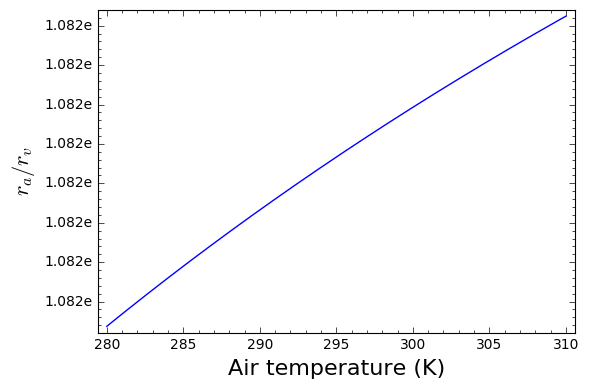

T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l == 310.133484539870
T_l == 310.133484539870
T_l == 309.093414355984
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000
4*T_l^3*a_sh*epsilon_l*sigm
[
Rll1 == -3*T1^4*a_sh*epsilon_l*sigm - T_w^4*a_sh*epsilon_l*sigm
]


R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

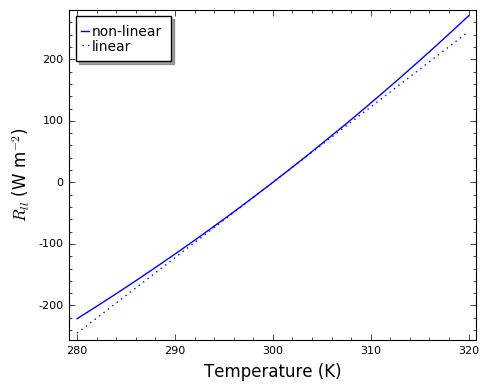

E_l == -(P_wa - P_wl)*c_E

H_l == -(T_a - T_l)*c_H

R_ll == -(3*T_a^4 - 4*T_a^3*T_l + T_w^4)*a_sh*epsilon_l*sigm

gamma_v == c_H/c_E

Delta_eTa == (P_was - P_wl)/(T_a - T_l)

E_l == -(P_wa*c_H - P_wl*c_H)/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -(Delta_eTa*T_a - Delta_eTa*T_l + P_wa - P_was)*c_H/gamma_v

kilogram/second^3 == kilogram/second^3


E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kilogram/second^3 == kilogram/second^3


T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

kelvin == kelvin


T_l == ((3*T_a^4 + T_w^4)*a_sh*epsilon_l*sigm + (Delta_eTa*T_a + P_wa - P_was)*c_E + T_a*c_H + R_s)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

E_l == -((Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E*epsilon_l*sigm - Delta_eTa*R_s*c_E + (P_wa - P_was)*c_E*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

E_l == -((M_w*P_wa*T_w^4 + (3*M_w*P_wa - 4*M_w*P_wl)*T_a^4)*a_sh*epsilon_l*g_tw*lambda_E*sigm + (M_w*P_wa*R_s + (M_w*P_wa - M_w*P_wl)*T_a*c_H + (M_w*P_wa^2 - M_w*P_wa*P_was + (Delta_eTa*M_w*P_wa - Delta_eTa*M_w*P_wl)*T_a)*c_E)*g_tw*lambda_E)/(R_mol*T_a^2*c_H + (3*R_mol*T_a^5 + R_mol*T_a*T_w^4)*a_sh*epsilon_l*sigm + R_mol*R_s*T_a + (Delta_eTa*R_mol*T_a^2 + (P_wa - P_was)*R_mol*T_a)*c_E)

H_l == -((T_a^4 - T_w^4)*a_sh*c_H*epsilon_l*sigm - ((P_wa - P_was)*c_E + R_s)*c_H)/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

R_ll == (4*R_s*T_a^3*a_sh + (Delta_eTa*T_a^4 - Delta_eTa*T_w^4 + 4*(P_wa - P_was)*T_a^3)*a_sh*c_E + (T_a^4 - T_w^4)*a_sh*c_H)*epsilon_l*sigm/(4*T_a^3*a_sh*epsilon_l*sigm + Delta_eTa*c_E + c_H)

T_l = 308.321395271
E_l = 180.542235053941
H_l = 150.521099595469
R_ll = 68.9366653505872
g_bw = 0.0131620455576424
g_tw = 0.00291849206962754
Direct estimates: 
E_l = 177.353891811830
H_l = 153.963492920038
T_l = 308.443094724766
R_ll = 68.6826152681320
308.443094724766 == 308.443094724766
308.443094724766 == 308.443094724766
308.443094724766 == 307.807922524752
400 == 400.000000000000
Using T_l from eq_Tl_Delta_Rlllin.rhs() only to calculate R_ll: 
T_l = 308.443094724766
R_ll = 70.5556017512511
E_l = 176.784812127415
H_l = 152.659586121334
400 == 400.000000000000
Penman-stomata: 
E_l = 198.222104889662
H_l = 201.777895110338
T_l = 310.133484539870
400 == 400.000000000000
PM-equation: 
E_l = 241.448619283973
H_l = 158.551380716027
400 == 400.000000000000
MU-equation: 
E_l = 156.668183937778
H_l = 243.331816062222
400 == 400.000000000000
Corrected MU-equation: 
E_l = 195.741933442269
H_l = 204.258066557731
400 == 400.000000000000
imported file data/E_PM_eqs


In [11]:
list_wsnames = ['leaf_enbalance_eqs', 'E_PM_eqs']
folder = 'data/'
fun_export_load_ipynb(list_wsnames, folder)